In [2]:
import tensorflow as tf

In [29]:
import pandas as pd
Sequential = tf.keras.Sequential # 모델
Dense = tf.keras.layers.Dense # 뉴런
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


20/20 [==============================] - 0s 947us/step - loss: 0.1310 - accuracy: 0.9430
Loss: 0.13102252781391144, Accuracy: 0.9429967403411865
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 16)                144       
                                                                 
 dense_69 (Dense)            (None, 8)                 136       
                                                                 
 dense_70 (Dense)            (None, 16)                144       
                                                                 
 dense_71 (Dense)            (None, 8)                 136       
                                                                 
 dense_72 (Dense)            (None, 16)                144       
                                                                 
 dense_73 (Dense)            (None, 8)  

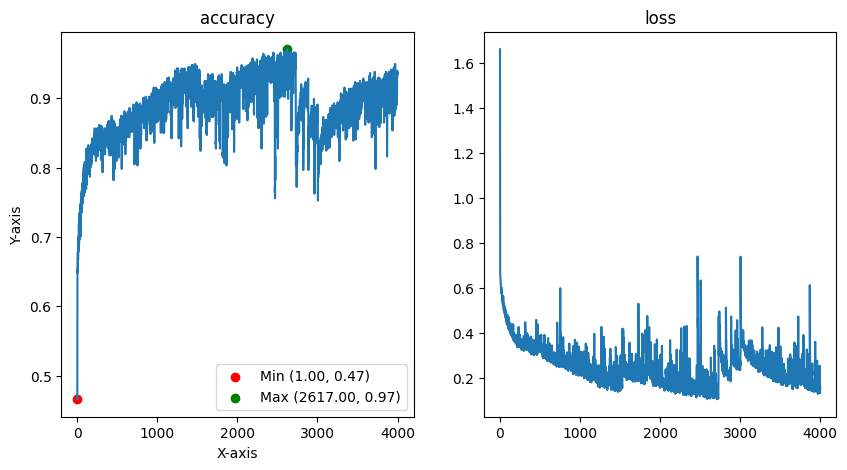

In [41]:
path = r'https://github.com/taehojo/deeplearning/raw/master/data/pima-indians-diabetes3.csv'
df = pd.read_csv(path, header=None)
df.columns = df.iloc[0]
df = df.iloc[1:, :]
# df = df.iloc[1:, :].astype('float')
# pregnant	plasma	pressure	thickness	insulin	bmi	pedigree	age	diabetes
df['pregnant'] = df['pregnant'].astype('int')
df['plasma'] = df['plasma'].astype('int')
df['pressure'] = df['pressure'].astype('int')
df['thickness'] = df['thickness'].astype('int')
df['insulin'] = df['insulin'].astype('int')
df['bmi'] = df['bmi'].astype('float')
df['pedigree'] = df['pedigree'].astype('float')
df['age'] = df['age'].astype('int')
df['diabetes'] = df['diabetes'].astype('int')
model = Sequential()

x_train = df.iloc[:, 0:8]
y_train = df['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model.add(Dense(8 * 2, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu')) # 은닉층의 수가 줄어드니까 더 잘나오나?
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = range(1,3001)
accuracy_arr = []
loss_arr = []
for epoch in epochs:
    history = model.fit(x_train, y_train, epochs=1, verbose=1)
    # 가중치와 편향 출력
    weights, biases = model.layers[0].get_weights()
    clear_output(wait=True) # clear_screen()
    print("에포크 (epoch):\n", epoch)
    print("편향 (Biases):\n", biases)
    print("가중치 (Weights):\n", weights)
    
    accuracy = history.history['accuracy'][0]
    accuracy_arr.append(accuracy)
    loss_arr.append(history.history['loss'])
    print("정확도 (Biases):\n", accuracy)
    if accuracy == 1.0 and epochs > 10 :
        print(f"정확도가 100%에 도달한 에포크: {epoch + 1}")
        break
clear_output(wait=True)
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')
model.summary()


# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 서브플롯


# 최소값과 최대값 표시
min_y, max_y = min(accuracy_arr), max(accuracy_arr)
min_x = epochs[np.argmin(accuracy_arr)]
max_x = epochs[np.argmax(accuracy_arr)]

# 최소값과 최대값을 그래프에 표시
ax1.scatter(min_x, min_y, color='red', label=f'Min ({min_x:.2f}, {min_y:.2f})')
ax1.scatter(max_x, max_y, color='green', label=f'Max ({max_x:.2f}, {max_y:.2f})')

# 레이블 및 범례 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend()

# 첫 번째 서브플롯 (왼쪽)
ax1.plot(epochs, accuracy_arr)
ax1.set_title("accuracy")

# 두 번째 서브플롯 (오른쪽)
ax2.plot(epochs, loss_arr)
ax2.set_title("loss")
plt.show()

In [19]:
df # 768 * 9   diabetes 8
df.isna().sum()
# df.info()
df.head()
# help(df.set_index)
df.columns = df.iloc[0]
df.head()
df = df.iloc[1:, :]
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
